# Distant Reading, переходим к Python

## Чему можно научиться по этой тетрадке?

Здесь показаны простые, но полезные и широко примениемы способы обработки и количественного исследования текста в Python:

* Чтение текстового файла из программы
* Токенизация (разбиение текста на слова) и подсчет числа слов
* Подсчет частотностей слов. Построение графиков типа такого:

![pyfreqs1](pics/pyfreqs1.png)

* Анализ распределения слов по тексту. Построение графиков типа таких: 

![pydistr1](pics/pydistr1.png)
![pydistr2](pics/pydistr2.png)

* В т.ч. и на достаточно большом корпусе (сотни, а то и тысячи текстов).

![corpus_graph](pics/corpus_graph.png)

## Как использовать этот код 

### (можно пропустить эту часть, если вы знаете, что такое Jupyter и ipynb-тетрадки -- в таком случае переходите сразу к "Начало работы")
То, на что вы сейчас смотрите — тетрадка Jupyter Notebook. Это одна из популярных сред для написания и __демонстрации__ кода на Python (и не только). Jupyter запускает питоновский код прямо в браузере (но локально, т.е. код исполняет ваш компьютер, в отличие от, например облачного Google Colab). В Jupyter код можно запускать не целиком, а по ячейкам (в отличие от IDLE). 

Пример:

In [1]:
# ячейка с кодом
text = 'Мы с Даней сегодня пробуем в дистант ридинг'
print (text)

Мы с Даней сегодня пробуем в дистант ридинг


In [2]:
# еще одна ячейка с кодом. 
# Пространство имен общее — переменная text была заполнена в предыдущей ячейке
print (text.upper())

МЫ С ДАНЕЙ СЕГОДНЯ ПРОБУЕМ В ДИСТАНТ РИДИНГ


Такой последовательный режим запуска кусочков кода особенно удобен в преподавании. Поэтому, например, Яндекс делает многие курсы в ipynb ([типа такого](https://github.com/yandexdataschool/nlp_course/tree/master)) 


Кроме того, ячейки бывают текстовыми — их можно форматировать с помощью формата разметки markdown (.md). Текст, который вы сейчас читаете, а также всякие описания и картинки в предыдущей части этого занятия, написаны как раз в таком формате. Файлы Jupyter Notebook имеют расширение .ipynb и автоматически рендерятся гитхабом. Например, вот эта __[тетрадка](first_dr_notebook_danya.ipynb)__  у меня на гитхабе.  

## Окей, а как я могу запустить код в таком .ipynb?

Есть разные варианты: 

### Через __[Google Colab](https://colab.research.google.com)__. 

Google Colab — это гугловский инструмент для написания кода в браузере и запуска прямо на серверах Google (с возможностью бесплатно использовать их вычислительные мощности, в т.ч. графические процессор  — GPU).  Google Colab — родственник Jupyter, они очень похожи. Разница в том, что Jupyter работает локально и использует ваш собственный питон, а Google Colab — это облачный сервис, похожий на Google Docs: вы можете делиться тетрадками и т.д. В Colab можно открыть эту тетрадку, указав ссылку на нее: 

![Colab](pics/git2colab_new.png) 

Просто загрузить .ipynb-файл в Colab тоже можно. 

### Скачать себе .ipynb и открыть в Jupyter

Скачать .ipynb с гитхаба: 

![Raw](pics/raw_download.png) 

Поставить Jupyter Notebook по инструкции __[отсюда](https://jupyter.readthedocs.io/en/latest/install.html)__. Открыть терминал (в Windows — командную строку).пойти в папку, внутри которой лежит скачанный .ipynb, написать там jupyter notebook. После этого у вас должно открыться в браузере что-то такое:

![Colab](pics/jupyter.png)

Тыкайте на тетрадку -- и все, можно работать в ней, писать код и т.п. Из Jupyter можно выгрузить и отдельно код в виде файла .py (но тогда разделение на ячейки пропадет).

### Клонировать репозиторий

Чуть более продвинутся версия предыдущего варианта. Делаете

$ git clone https://github.com/dhhse/dhminor

(

только учтите, что вам нужен не master, а бранч gh-pages:

$ git checkout gh-pages

)

И у вас есть этот код, а к тому же и все тексты рядом с ним (в папке texts лежит наш корпус в лемматизированном виде). **Правда, скачиывание через небыстрый интернет может занять сколько-то времени**.

### Скачать .ipynb и открыть в PyCharm
Если вы любите популярную у питонистов IDE PyCharm  -- она умеет открывать ipynb. Но для этого все равно нужен установеленный Jupyter. Поэтому надо проделать все то же, что в предыд.пункте, а потом открыть файл в PyCharm.

### Скачать файл .py из Google Colab или Jupyter и открыть любой IDE (IDLE, PyCharm, что угодно...)
Из Colab после создания копии вы можете выгрузить не весь .ipynb, а только код в .py. Этот код уже можно запускать где угодно, хоть из командной строки (терминала) вашего компьютера. Но тогда разделение на ячейки опять-таки пропадет.

## Начало работы

### Самый простой пример: работаем в Python с одиночным текстом

NB: в ячейке ниже НЕ питоновский код, команда ls — стандартная команда для терминала/командной строки ("показать содержимое папки"), выполненная через Jupyter (чтобы сказать юпитеру, что команду нужно послать в командную строку, а не в питон, надо поставить воскл.знак перед командой); [подробнее тут](https://habr.com/ru/company/wunderfund/blog/316826/)

In [ ]:
# у себя в репозитории я положил рядом с кодом пример текста — Преступление и наказение Ф.М. Достоевского
# вот так я проверю, что рядом в папке лежит файл с корпусом 
!ls

In [ ]:
# У тех, кто открыл тетрадку в Google Colab, файла не будет. 
# В случае, когда нам нужен всего один файл, это можно решить простым способом: вы сами загрузите файл в колаб 
# Вот стандартный питоновский код для загрузки файлов в колаб
# Если работаете в Jupyter — запускать не нужно
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

 __[На всякий случай: прямая ссылка на текстовый файл](https://github.com/dhhse/dhcourse/blob/master/dr_practice/Dostoevsky_PrestuplenieINakazanie.txt)__

In [4]:
# откроем файл в питоне
path_to_file = 'Dostoevsky_PrestuplenieINakazanie.txt'
prest_i_nak = open (path_to_file, 'r')
prest_i_nak_kak_stroka = prest_i_nak.read()

In [6]:
# посчитаем длину этой строки
len (prest_i_nak_kak_stroka) 

## это в 

1094386

In [7]:
## посмотрим на первые 100 символов строки
prest_i_nak_kak_stroka [:100]
## и нажмите выполнить

'Преступление и наказание \n\nРоман в шести частях с эпилогом\n\n  \nЧасть первая\n\nI\n\n   В начале июля, в '

# Сегментация текста

## 0. Простейший способ сегментации строки на токены (≈ на слова, но грубо) — встроенный метод питоновских строк .split:

In [8]:
prest_i_nak_kak_spisok_slov = prest_i_nak_kak_stroka.split() ## здесь в качестве аргумента можно воткнуть разделитель; по умолчанию это любое количество пробелов
print ('Примерное количество слов в "Преступлении и наказании":', len (prest_i_nak_kak_spisok_slov))

Примерное количество слов в "Преступлении и наказании": 176283


In [9]:
# посмотрим на этот список
prest_i_nak_kak_spisok_slov[:20]

['Преступление',
 'и',
 'наказание',
 'Роман',
 'в',
 'шести',
 'частях',
 'с',
 'эпилогом',
 'Часть',
 'первая',
 'I',
 'В',
 'начале',
 'июля,',
 'в',
 'чрезвычайно',
 'жаркое',
 'время,',
 'под']

### попробуем получить список уникальных слов:

In [12]:
prest_i_nak_kak_mnojestvo_slov = set(prest_i_nak_kak_spisok_slov) ## превратим список в множество
len (prest_i_nak_kak_mnojestvo_slov) ## получим число уникальных слов

41063

In [ ]:
prest_i_nak_kak_spisok_unikalnyh_slov = list (prest_i_nak_kak_mnojestvo_slov)
(prest_i_nak_kak_spisok_unikalnyh_slov).sort()
prest_i_nak_kak_spisok_unikalnyh_slov [:1000]

## 1. Более умный способ: сегментируем текст регекспом

In [14]:
## питоновский модуль для регекспов
## ВООБЩЕ-ТО так делать НЕХОРОШО, потому что в тетрадках положено все импорты пихать в самую верхнюю ячейку
## но я считаю, что здесь в педагогических целях можно
import re

In [15]:
prest_i_nak_spisok_re =  re.split (' +|[.,!?–]|\n',prest_i_nak_kak_stroka)

In [16]:
prest_i_nak_spisok_re [:20]

['Преступление',
 'и',
 'наказание',
 '',
 '',
 'Роман',
 'в',
 'шести',
 'частях',
 'с',
 'эпилогом',
 '',
 '',
 '',
 'Часть',
 'первая',
 '',
 'I',
 '',
 '']

## 2. Еще более умный способ: сегментируем текст готовым токенизатором — возьмем его из прекрасной библиотеки для обработки языка NLTK 

Кстати, [приглядитесь к NLTK](https://www.nltk.org/), там много полезного и хорошая [книжка](https://www.nltk.org/book/)

In [ ]:
# если у вас еще нет nltk, установите его:
!pip install nltk

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
prest_i_nak_nltk_tokenized = word_tokenize (prest_i_nak_kak_stroka)
prest_i_nak_nltk_tokenized [:20]

['Преступление',
 'и',
 'наказание',
 'Роман',
 'в',
 'шести',
 'частях',
 'с',
 'эпилогом',
 'Часть',
 'первая',
 'I',
 'В',
 'начале',
 'июля',
 ',',
 'в',
 'чрезвычайно',
 'жаркое',
 'время']

### А теперь давайте посчитаем частотность слов в нашем списке слов; т.е. собственно как часто повторяется каждое

In [ ]:
## для этого мы тоже не станем писать свое решение с нуля, а воспользуемся готовым от NLTK
## возьемем токенизированный список — и засунем его в функцию FreqDist от NLTK
from nltk import FreqDist
word_freqs_prest_i_nak = FreqDist(prest_i_nak_nltk_tokenized)
word_freqs_prest_i_nak.most_common (100)

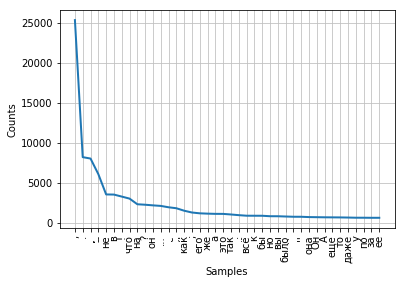

In [21]:
word_freqs_prest_i_nak.plot(40, cumulative=False)

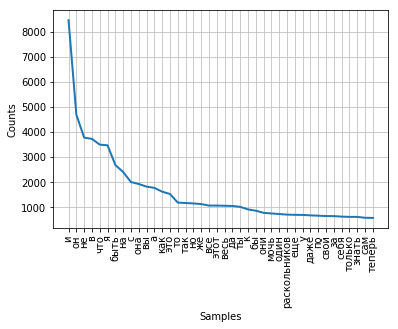

In [35]:
## можно еще почистить
## засуну во FreqDist список, в котором нет слов, 
## содержащих разные знаки препинания, пробелы, переносы и т.п.

word_freqs_prest_i_nak_cleaned = FreqDist(word for word in prest_i_nak_by_mystem if re.search ('[, !;:\n]', word) == None)
word_freqs_prest_i_nak_cleaned.plot(40, cumulative=False)

# Нормализация текста на уровне словоизменения: стемминг, лемматизация, морфологический анализ

Пока мы делали статистику только по формам слов (словоформам). Т.е. "конь" и "конями" у нас считались совершенно разными словами. 

Самый простой способ нормализации слов в языках с морфологией — стемминг. Стемминг — это очень грубое разбиение формы на предполагаемую основу и предполагаемую флексию. Программы-стеммеры умеют превращать фразу "Vyshka's students coded" в "Vyshka student code", 'Маша поехала за грибами' в 'Маш поехал за гриб', а 'Даня работает в Вышке' в "Дан работ в Вышк"

### В том же NLTK есть готовая реализация стеммера для русского языка. Давайте потестируем ее!

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")

In [ ]:
## стеммер не быстрый, поэтому давайте возьмем первые 1000 слов, а не все
first_1000 = prest_i_nak_nltk_tokenized[:1000]
## этот стеммер не умеет сам токенизировать -- он работает только с отдельными словами. 
## Поэтому придется скармливать ему наш список по одному: 
prest_i_nak_first_1000_stemmed = []
for word in first_1000:
    prest_i_nak_first_1000_stemmed.append (stemmer.stem(word))

In [ ]:
prest_i_nak_first_1000_stemmed

In [ ]:
## Но вообще стеммеры обычно применяются для английского с его небогатой морфологией и частым тождеством 
## голой основы -- и нач.формы
## Английский пример.
en_stemmer = SnowballStemmer("english")
string = 'I love teaching students at HSE'
tostem = string.split()
for word in tostem:
    print (en_stemmer.stem(word))

# Лемматизация текста

Лемматизация — более традиционный для русского языка вариант, когда слова привожятся к начальной (словарной) форме. Т.е.  "Даня работает в Вышке" превращается в "Даня работать в Вышка". После такого преобразования мы можем (с оговорками, конечно) считать статистику для слов целиком, а не только для отдельных словоформ.

### MyStem

__[Mystem](https://tech.yandex.ru/mystem/)__ - это свободно распространяемый морфологический анализатор для русского языка с закрытым исходным кодом. То есть мы можем его бесплатно скачать с сайта и пользоваться им, но не можем посмотреть, что у него внутри и как оно работает.

Mystem был придуман одним из создателей Яндекса Ильёй Сегаловичем. Некоторый потомок Mystem'а до сих пор работает внутри большого поисковика Яндекса, анализируя слова при поиске.

MyStem значит my stemmer. Как мы с вами уже знаем (см. выше), стемминг -- это разбиение формы на основу и флексию. Программы-стеммеры умеют превращать фразу 'Маша поехала за грибами' в 'Маш поехал за гриб'. **Но на самом деле MyStem не стеммер, а полноценный морфологический АНАЛИЗАТОР**. Он может гораздо больше: устанавливать словарную форму слова, определять часть речи и грамматические характеристики (падеж, число, время, род...). В последних версиях Mystem умеет и выбирать из нескольких возможных грамматических разборов один, наиболее верный.

У Mystem нет графического оконного интерфейса, запустить его можно только из командной строки. Зато есть обертка для Python — pymystem3. Правда, с ней все работает тяжело — иногда лучше запускать из командной строки. И обертка pymystem3 очень плохо дружит с колабом. 

__[Документация к MyStem](https://tech.yandex.ru/mystem/doc/index-docpage/)__

### Запускаем MyStem (для тех, кто запускает НЕ в Колабе):
#### (А что с колабом? Ответ [тут](#colab_trouble))

In [ ]:
# эта клетка нужна вам, если у вас не установлен модуль pymystem3.
!pip install pymystem3
## (NB: это снова не питон, а команда для командной строки)

In [25]:
## В pymystem3 есть класс MyStem -- это как бы готовый анализатор MyStem, упакованный в питоновский класс 
## импортируем непосредственно класс "анализатор MyStem" из pymystem3
from pymystem3 import Mystem

In [ ]:
help (Mystem()) ## всегда полезно почитать хелпы!

In [26]:
moi_analizator = Mystem() ## создаем экземпляр класса "анализатор MyStem" 
test = 'Даня тестирует машинную морфологию' ## создаем тестовую строку
lemmatized = moi_analizator.lemmatize(test) ## лемматизируем строку с помощью mystem 
print (lemmatized) ## напечатаем лемматизированную строку

['даня', ' ', 'тестировать', ' ', 'машинный', ' ', 'морфология', '\n']


In [27]:
clean_prest_i_nak_kak_stroka = re.sub ('[.,?!-:]', '', prest_i_nak_kak_stroka)

In [28]:
prest_i_nak_by_mystem = moi_analizator.lemmatize(clean_prest_i_nak_kak_stroka) ## лемматизируем преступление и наказание с помощью mystem 
#print  (prest_i_nak_kak_by_mystem)

In [29]:
word_freqs_prest_i_nak = FreqDist(word for word in prest_i_nak_by_mystem if re.search ('[, !;:\n]', word) == None)
word_freqs_prest_i_nak.most_common (20)

[('и', 8453),
 ('он', 4692),
 ('не', 3779),
 ('в', 3727),
 ('что', 3498),
 ('я', 3470),
 ('быть', 2685),
 ('на', 2407),
 ('с', 2007),
 ('она', 1929),
 ('вы', 1824),
 ('а', 1775),
 ('как', 1623),
 ('это', 1531),
 ('то', 1188),
 ('так', 1172),
 ('но', 1155),
 ('же', 1130),
 ('все', 1070),
 ('этот', 1069)]

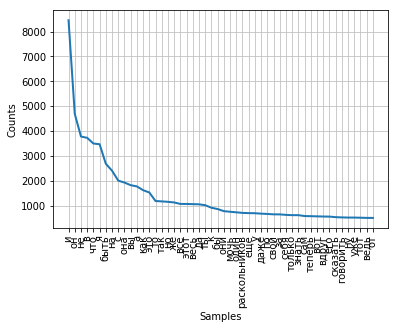

In [32]:
word_freqs_prest_i_nak.plot (50, cumulative=False)

## Отсюда можно переходить к исследованию распределения слов по тексту (прямо сюда) 

### Необязательная факультативная часть морфологический анализ (можно пропустить)

Как я уже сказал, mystem -- полноценный анализатор, умеет сказать, в каком роде-числе-падеже-времени слово и т.п. Для этого используется второй метод — analyze. 

In [ ]:
analyzed = moi_analizator.analyze(test) ## лемматизируем строку с помощью mystem 
print (analyzed) ## напечатаем лемматизированную строку

### Есть и альтернативные способ работать с mystem, не используя обертку pymystem3

Во-первых, вы можете просто [скачать mystem](https://yandex.ru/dev/mystem/) (исполняемый файл) и запускать его из терминала / командной строки вообще без какого-либо питона. Вот пример:

![mystem_terminal.png](pics/mystem_terminal.png)

Во-вторых, можно из питона ходить в командную строку с помощью встроенной библиотеки os и запускать майстем  (не очень элегантно получается, но зато гораздо быстрее работает):

In [ ]:
import os

## скажите питону, где у вас MyStem
path_to_mystem_on_my_machine = "folder_with_mystem/mystem"
os.system(path_to_mystem_on_my_machine + ' -lnd ' + path_to_file + ' Lemmatized' + path_to_file)

In [32]:
## А в jupyter, как вы уже м.б. помните, можно еще и обращаться к командной строке с помощью  !

! folder_with_mystem/mystem -lnd 'Dostoevsky_PrestuplenieINakazanie.txt' 'LemmDostoevsky_PrestuplenieINakazanie.txt'

<a id='colab_trouble'></a>
## К сожалению, ни один из описанных способов запуска MyStem (при всем их многообразии) нельзя легко воспроизвести в Колабе.

* Стандартный pymystem3 там не работает (говорят, работает, если поставить версию 0.10.10 (т.е. вместо !pip install pymystem3 сделать !pip install pymystem3==0.1.10) и перезапустить тетрадку, но у меня все равно не сработало) 
* загрузить туда исполняемый файл mystem и запустить его мне не удалось
* можно попробовать загрузить архив и распаковать, но не факт, что сработает

# Для тех кто работает как в Колабе, так и не в Колабе

## pymorphy2

pymorphy2 - это не обертка, а целиком написанный на Python морфологический анализатор -- открытый и свободный. Он может делать то же, что и pymystem3, и даже больше: изменять слова в нужную форму (спрягать и склонять). При этом pymorphy2 справляется и с незнакомыми словами.

[документация](https://pymorphy2.readthedocs.io/en/latest/)

pymorphy2 обучался на словарях проекта OpenCorpora, что накладывается определённый отпечаток на его набор грамматических тегов (например, он не очень хорошо совместим с набором грамм.тегов Mystem). Более того, даже внутри себя pymorphy2 противоречив: теги анализа не совсем совпадают с тегами синтеза (т.е. теми, которые он умеет принимать, когда вы хотите поставить слово в нужную форму)

Для работы точно так же надо создать экземпляр класса анализатор, только теперь класс называется не `Mystem` a `MorphAnalyzer`. Рекомендуется создать один экземпляр и дальше с ним и работать, поскольку он занимает достаточно много памяти, и если создать несколько экземпляров анализаторов, то они будут тормозить программу.

In [ ]:
## Если не установлен pymorphy2
!pip install pymorphy2
## можете попробовать также быструю версию pip install pymorphy2[fast], но тут возможны проблемы 

In [30]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [29]:
morph.parse ('конями')

[Parse(word='конями', tag=OpencorporaTag('NOUN,anim,masc plur,ablt'), normal_form='конь', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'конями', 354, 10),))]

In [15]:
morph.parse ('мыло')

[Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='мыло', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'мыло', 54, 0),)),
 Parse(word='мыло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='мыло', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'мыло', 54, 3),)),
 Parse(word='мыло', tag=OpencorporaTag('VERB,impf,tran neut,sing,past,indc'), normal_form='мыть', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, 'мыло', 1813, 9),))]

In [12]:
## Важная для нас разница с MyStem — в том, что pymorphy не токенизирует строку автоматически. 
## Ему все-таки нужны уже токенизированные слова (так же, как мы делали выше со стеммером), а не целая строка, как умеет mystem

In [13]:
# Так не сработает, хотя результат интересный и кое-что дает 
test = 'Даня еще раз тестирует машинную морфологию'
morph.parse (test)

[Parse(word='даня еще раз тестирует машинную морфологию', tag=OpencorporaTag('NOUN,inan,femn sing,accs'), normal_form='даня еще раз тестирует машинную морфология', score=1.0, methods_stack=((<FakeDictionary>, 'даня еще раз тестирует машинную морфологию', 40, 3), (<KnownSuffixAnalyzer>, 'логию')))]

In [ ]:
# А вот так сработает
for word in test.split():
    print (morph.parse (word))

In [ ]:
Посмотрим, из чего состоит parse
help (pymorphy2.parse)

In [18]:
## напишем небольшой цикл для лемматизации каждого слова в списке токенов

my_tokens = test.split()
for word in my_tokens:
    rezultat = morph.parse(word)
    naibolee_veroyantniy = rezultat[0] ## почему мы берем первый разбор? 
    ## см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
    nach_forma = naibolee_veroyantniy.normal_form
    print ('Начальная форма: ', nach_forma)

Начальная форма:  даня
Начальная форма:  ещё
Начальная форма:  раз
Начальная форма:  тестировать
Начальная форма:  машинный
Начальная форма:  морфология


## Задание: сделать лемматизацию "Преступления и наказания" с помощью PyMophy2 

1. напечатать 100 первых слов 
2. напечатать 100 самых частотных слов

### Вариант решения 1 (с использованием уже сделанной нами выше токенизации): 

Т.к. выше мы уже токенизировали текст (см. раздел "сегментация текста" выше) и сложили результат в виде списка слов в переменную prest_i_nak_nltk_tokenized, можно просто пройтись по словам в этом списке и применить к ним анализатор PyMorphy2

In [24]:
lemmatized_pres_i_nak = []
for word in prest_i_nak_nltk_tokenized:
    rezultat_analiza = morph.parse(word)
    naibolee_veroyantniy_razbor = rezultat_analiza[0] ## почему мы берем первый разбор? 
    ## см.в этом месте: https://pymorphy2.readthedocs.io/en/latest/user/guide.html#select-correct
    lemma = naibolee_veroyantniy_razbor.normal_form
    lemmatized_pres_i_nak.append(lemma)

Работает это, правда, долго, секунд 20-30 :( 

In [40]:
print (lemmatized_pres_i_nak[:20])

['преступление', 'и', 'наказание', 'роман', 'в', 'шесть', 'часть', 'с', 'эпилог', 'часть', 'один', 'i', 'в', 'начало', 'июль', ',', 'в', 'чрезвычайно', 'жаркое', 'время']


In [ ]:
## 100 самых частотных можно сделать с помощью FreqDist 
FreqDist(lemmatized_pres_i_nak).most_common(100)

### Если не нравятся запятые и пробелы в списке частотностей -- можно их убрать в какой-то момент

In [ ]:
## 100 самых частотных можно сделать с помощью FreqDist
for word in lemmatized_pres_i_nak:
    if word in [',','!',';','?','.',' ',':', '&','--','...','-']:
        lemmatized_pres_i_nak.remove(word)
FreqDist(lemmatized_pres_i_nak).most_common(100)

### Вариант 2: напишем полный пайплайн лемматизации на pymorphy2 от момента открытия текстового файла  в отдельной небольшой тетрадке

В этой тетрадке у нас уже много всего нагромождено, давайте в [отдельной маленькой тетрадке](pure_pymorphy2_for_dr.ipynb) решим конкретную задачу от начала до конца, чтобы вы были уверены, что понимаете последовательность действий.

Эта же тетрадка в [Colab](https://colab.research.google.com/drive/1o8NDFIc3_lDq_Z38XokWs-x2drFqk3gR#scrollTo=m3ULn1uux7to&forceEdit=true&sandboxMode=true), можно позапускать.

<a id='word_distr'></a>
## Распределение слов по тексту

Теперь можно подойти ближе к чему-то более похожему на distant reading. Например, распределение каких-то значимых для нас слов по тексту. 

В antConc мы делали такое с помощью ConcordancePlot

В Voyant есть няшный аналог — [BubbleLines](http://docs.voyant-tools.org/tools/bubblelines/)

В питоне можно придумать разные способы делать это, но один из самых простых — с помощью готового инструмента (вернее, метода) dispersion_plot в уже упомянутой прекрасной библиотеке NLTK. Из NLTK понадобится импортировать [модуль Text](https://www.nltk.org/api/nltk.html#module-nltk.text)):

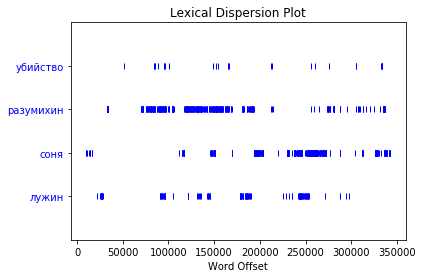

In [31]:
from nltk import Text as nltk_text
prest_i_nak_nltk_format = nltk_text(prest_i_nak_by_mystem)
prest_i_nak_nltk_format.dispersion_plot(["убийство", "разумихин", "соня", "лужин"])

## График частотности слова (или возвращаясь к DIY-философии DH)

В Voyant мы строили графики частотности слова по документу или корпусу. Типа таких: 

![samolet](pics/samolet.png)

В питоне для этого я не нашел готового решения сходу (т.е. за 5 минут гугления и прочесывания [книжки по NLTK](https://www.nltk.org/book/)), хотя оно наверняка есть. Поэтому решил написать свое. Без комментирования оно заняло у меня минут 10.

In [62]:
# напишем код, который будет брать произвольное слово — и длину отрезка в тексте,
# а дальше идти по тексту, считая частотность слова в каждом отрезке такой длинны от начала до конца текста

chastotnosti = [] ## создадим список частотностей. Сюда мы будем записывать значения для нашего графика
dlina_otrezka = 10000 ## пока текст у нас один -- надо его как-то поделить, чтобы построить график;
## поэтому заведем переменную dlina_otrezka, чтобы хранить в ней длину отрезка

chastotnost_slova_v_otrezke = 0 ## это переменная, чтобы хранить частотность нашего слова
iskomoe_slovo = 'убийство' ## а это переменная для хранения самого нашего слова

## теперь напишем цикл, который будет идти по списку слов в тексте
## поскольку нам понадобится отслеживать число слов, которое мы уже прошли (чтобы делить на отрезков), 
## можно сразу использовать enumerate, который идет по массиву и перебирает одновременно элементы и их индексы
for index_slova, slovo in enumerate(prest_i_nak_by_mystem):
    if slovo.lower() == iskomoe_slovo.lower(): ## перебираем каждое словов в книжке и смотрим, является ли оно искомым
        chastotnost_slova_v_otrezke +=1 ## если да -- увеличиваем частотность на 1
    if not index_slova % dlina_otrezka: ## а тут проверяем, не дошли ли мы до конца отрезка. Если дошли, то остаток от деления 
        #(в питоне это оператор %) будет нулевым, а значит, выполнится условие "if not index_slova % dlina_otrezka:"
        chastotnosti.append (chastotnost_slova_v_otrezke/dlina_otrezka) ## нормируем частотность на размер сегмента 
        ## и записываем ее в общий список частотностей 
        chastotnost_slova_v_otrezke = 0 ## обнуляем счетчик частотностей -- ведь нам нужны отдельные за каждый отрезок
chastotnosti.append (chastotnost_slova_v_otrezke/ (index_slova%dlina_otrezka)) ## в этой строчке мы учитываем последний сегмент, который 
    ## в for-цикле выше не обрабатывается (т.к. там только на точках, где число кратно длине сегмента, частотность сохраняется)
    ## Размер последнего сегмента меньше, т.к. 
    ## цикл обрывается на посл.слове.  мы 
    ## вычисляем размер последнего короткого сегмента как остаток от 
    ## деления индекса последнего слова (еще здесь можно было просто измерить длину текста) — на длину отрезка  
    
print (chastotnosti)
        

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0, 0.0004, 0.0003, 0.0001, 0.0, 0.0, 0.0, 0.0001, 0.0002, 0.0003, 0.0, 0.0, 0.0, 0.0, 0.0002, 0.0, 0.0, 0.0, 0.0001, 0.0001, 0.0001, 0.0, 0.0, 0.0002, 0.0, 0.0, 0.0006, 0.0]


## Завернем этот код в отдельную функцию, чтобы было удобно

Функция в программировании -- примерно как функция в математике: отображение чего-то (вход, т.е. аргументы функции) во что-то еще (выход) по каким-то правилам. Например, вот функция, чтобы уменьшать число на 5:

`def minuspyat (x):
    return x - 5`
    
В питоне функции задаются с помощью специального слова `def`, после которого в скобках пишутся обозначения аргументов функции. Результат функции выдается с помощью команды `return`. 

Вот функция, которая будет складывать два числа:

In [32]:
def plus (a, b):
    return a + b

In [33]:
plus (4,3)

7

### Ниже наш код для подсчета частотностей -- уже в виде функции, в которую можно передать длину отрезка, искомое слово и текст в виде списка слов 

In [38]:
# создадим отдельную функцию под названием schitaem_chastotnosti, которая будет брать на вход слово
## — и длину отрезка в тексте,
# а дальше идти по тексту, считая частотность слова в этом отрезка
def schitaem_chastotnosti (iskomoe_slovo, dlina_otrezka, tokenized_text):
    chastotnosti = [] ## создадим список частотностей. Сюда мы будем записывать значения для нашего графика
    chastotnost_slova_v_otrezke = 0 ## это переменная, чтобы хранить частотность нашего слова
    ## теперь напишем цикл, который будет идти по списку слов в тексте
    ## поскольку нам понадобится отслеживать число слов, которое мы уже прошли (чтобы делить на отрезков), 
    ## можно сразу использовать enumerate, который вы уже проходили с Борисом Валерьевичем
    for index_slova, slovo in enumerate(tokenized_text):
        if slovo.lower() == iskomoe_slovo.lower(): ## перебираем каждое словов в книжке и смотрим, является ли оно искомым
            chastotnost_slova_v_otrezke +=1 ## если да -- увеличиваем частотность на 1
        if not index_slova % dlina_otrezka: ## а тут проверяем, не дошли ли мы до конца отрезка. Если дошли, то остаток от деления 
            #(в питоне это оператор %) будет нулевым, а значит, выполнится условие "if not index_slova % dlina_otrezka:"
            chastotnosti.append (chastotnost_slova_v_otrezke/dlina_otrezka) ## нормируем частотность на размер сегмента 
            ## и записываем ее в общий список частотностей 
            chastotnost_slova_v_otrezke = 0 ## обнуляем счетчик частотностей -- ведь нам нужны отдельные за каждый отрезок
    chastotnosti.append (chastotnost_slova_v_otrezke/ (index_slova%dlina_otrezka)) ## в этой строчке мы учитываем последний сегмент, который 
        ## в for-цикле выше не обрабатывается (т.к. там только на точках, где число кратно длине сегмента, частотность сохраняется)
        ## Размер последнего сегмента меньше, т.к. 
        ## цикл обрывается на посл.слове.  мы 
        ## вычисляем размер последнего короткого сегмента как остаток от 
        ## деления индекса последнего слова (еще здесь можно было просто измерить длину текста) — на длину отрезка  

    return (chastotnosti)

In [39]:
schitaem_chastotnosti ('убийство', 10000, prest_i_nak_by_mystem)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001,
 0.0,
 0.0,
 0.0004,
 0.0003,
 0.0001,
 0.0,
 0.0,
 0.0,
 0.0001,
 0.0002,
 0.0003,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0002,
 0.0,
 0.0,
 0.0,
 0.0001,
 0.0001,
 0.0001,
 0.0,
 0.0,
 0.0002,
 0.0,
 0.0,
 0.0006,
 0.0]

### Теперь визуализируем этот список частотностей как график

In [40]:
import matplotlib.pyplot as plt

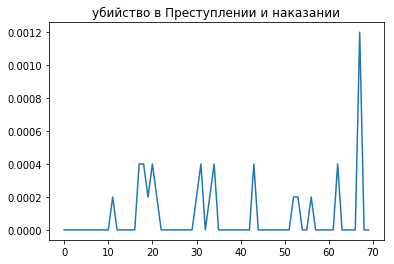

In [42]:
plt.title('убийство в Преступлении и наказании')
plt.plot (schitaem_chastotnosti ('убийство', 5000, prest_i_nak_by_mystem));


## Теперь как бы нам потрогать весь корпус

Если вы работаете с этим кодом локально  у себя на компьютере (напр. в Jupyter), то ничего сложного. 
Можно обойти каждый файл в корпусе с помощью цикла. Для этого в стандартной питоновской библиотеке `os`, предназначенной для работы с операционной системой вашего компьютера, есть функция `walk` — обходчик файлов и папок.

Вот так я обойду все, что лежит в подпапке texts внутри той папки на компьютере, из которой я сейчас запускаю код.

In [45]:
from os import walk

In [39]:
for path, dirs, filenames in walk ('texts'):
    for filename in filenames[:10]:
        print (filename)

1958_Efremov_Tumannost_Andromedy.txt
2011_Yemets_Mefodiy_Buslaev_Ognennye_vrata.txt
1979_Gulyakovskij_Sezon_tumanov.txt
1966_Shefner_Chelovek_s_pyatu_ne_ili_ispoved_prostodushnogo.txt
2003_Chubarian_Igri_v_zhizn.txt
1992_ Bulychev_Naslednik.txt
1922_Itin_Strana_Gonguri.txt
1969_Zabelin_Zapiski_hronoskopista.txt
1988_Malisheev_Marsianskaya_madonna.txt
1966_Strugatskie_Vtoroe_nashestvie_marsian.txt


### А что делать в Колабе? Там же этой папки нет! 

#### Кажется, проще всего — клонировать в колаб репозиторий! Вот так:

In [ ]:
! git clone https://github.com/DanilSko/dhminor

In [ ]:
# перейдите в нужный бранч:
! git checkout gh-pages

In [ ]:
# после выполнения можно проверить, что репозитория появился в колабе
! ls

In [ ]:
Теперь можно в колабе найти эту папку!

!ls distant_reading_practice/texts

#### Теперь вы можете прямо в колабе обойти те же тексты

Только путь к папке чуть длиннее:

In [ ]:
for path, dirs, filenames in walk ('../dhminor/distant_reading_practice/texts'):
    for filename in filenames[:10]:
        print (filename)

## В таком цикле можно открывать файлы и делать с ними все то же, что выше мы делали с одиночным файлом

In [48]:
from os.path import sep as razdelitel

In [49]:
for path, dirs, filenames in walk ('texts'):
    print (len(filenames))

340


In [51]:
for path, dirs, filenames in walk ('texts'):
    for filename in filenames[:5]:
        print (filename)
        file = open(path + razdelitel + filename, 'r')
        file_kak_stroka = file.read()
        nachalo = file_kak_stroka[:10]
        print (nachalo)

1958_Efremov_Tumannost_Andromedy.txt
иван ефрем
2011_Yemets_Mefodiy_Buslaev_Ognennye_vrata.txt


дмитрий 
1979_Gulyakovskij_Sezon_tumanov.txt
евгений гу
1966_Shefner_Chelovek_s_pyatu_ne_ili_ispoved_prostodushnogo.txt
1. введени
2003_Chubarian_Igri_v_zhizn.txt

александр


### Попробуем строить графики по всему корпусу

In [56]:
## обощим и немного упростим описанную выше функцию для подсчета частотностей: 
## будем считать упоминания слова в каждом тексте и делить на объем текста
def schitaem_chastotnosti_fulltext (iskomoe_slovo, put_k_faylam):
    vse_chastotnisti = []
    for path, dirs, filenames in walk ('texts'):
        filenames.sort() ## чтобы открывались потом в хронологическом порядке, отсортируем по названию
        for filename in filenames:
            if filename.endswith('.txt'): ## бывают еще всякие плохо видимые служебные файлы
                file_kak_stroka = open(path + razdelitel + filename, 'r').read()
                tokenized_file = word_tokenize(file_kak_stroka)
                chastota =  tokenized_file.count(iskomoe_slovo) ## у питоновских списков есть метод count, который позволяет посчитать число элементов
                vse_chastotnisti.append(chastota/len (tokenized_file))
    plt.title ( "слово " +iskomoe_slovo+ " в корпусе фантастических текстов")
    plt.plot (vse_chastotnisti)
    #return (vse_chastotnisti)

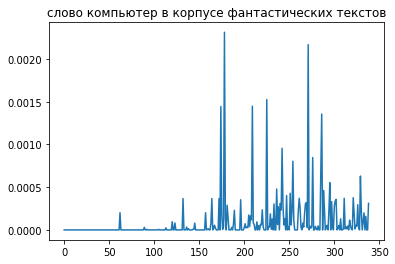

In [57]:
schitaem_chastotnosti_fulltext ('компьютер', 'texts')

### Как добавить временную шкалу по оси X? Придумайте сами!

## Еще нам может быть удобно слить весь наш корпус в один файл — и работать с ним

Но вообще это не всегда хорошая идея. Например, в GitHub нельзя запихать файл тяжелее 100 мб. Если захотите — [вот он просто на гугл драйве](https://drive.google.com/open?id=1dEps432C_6jqsIgxPmhPu4keD_9VnM69). 

## Пару слов про тематическое моделирование 

Я умею делать тематическое моделирование только по олдскулу с помощью MALLET.
Но в питоне можно запускать в питоне топик моделинг -- и автоматически визуализировать полученные топики в таком духе: 

![топики](pics/topics.png)

### Как это сделать в питоне? См. [тут](https://github.com/dhhse/dhcourse/blob/master/dr_practice/topic_modeling_and_graphs.ipynb): 